In [37]:
%reset -f
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
import plotly
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pandas_profiling import ProfileReport
pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [38]:
engine = create_engine("sqlite:////Users/nathanieldirenzo/Documents/GitHub/NBM_EDA_Student/resources/get_mta/mta_data.db")

In [39]:
df = pd.read_sql('SELECT * FROM mta_data LIMIT 1000000;', engine)
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/18/2021  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/18/2021  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/18/2021  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/18/2021  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/18/2021  19:00:00   

      DESC  ENTRIES    EXITS  
0  REGULAR  7672966  2645023  
1  REGULAR  7672969  2645040  
2  REGULAR  7672991  2645127  
3  REGULAR  7673037  2645193  
4  REGULAR  7673097  2645270

In [40]:
#profile = ProfileReport(df)
#profile

In [41]:
df = df.rename(columns={'C/A': 'control_area', 'UNIT': 'unit', 'SCP': 'subunit_channel_pos', 'STATION':'station', 'LINENAME':'subway_lines', 'DIVISION':'division', 'DATE':'date', 'TIME':'time', 'DESC':'desc', 'ENTRIES':'entries', 'EXITS':'exits'})

In [42]:
df.head()

control_area  unit subunit_channel_pos station subway_lines division  \
0         A002  R051            02-00-00   59 ST      NQR456W      BMT   
1         A002  R051            02-00-00   59 ST      NQR456W      BMT   
2         A002  R051            02-00-00   59 ST      NQR456W      BMT   
3         A002  R051            02-00-00   59 ST      NQR456W      BMT   
4         A002  R051            02-00-00   59 ST      NQR456W      BMT   

         date      time     desc  entries    exits  
0  12/18/2021  03:00:00  REGULAR  7672966  2645023  
1  12/18/2021  07:00:00  REGULAR  7672969  2645040  
2  12/18/2021  11:00:00  REGULAR  7672991  2645127  
3  12/18/2021  15:00:00  REGULAR  7673037  2645193  
4  12/18/2021  19:00:00  REGULAR  7673097  2645270

In [43]:
df.station.unique().tolist()

['59 ST',
 '5 AV/59 ST',
 '57 ST-7 AV',
 '49 ST',
 'TIMES SQ-42 ST',
 '34 ST-HERALD SQ',
 '28 ST',
 '23 ST',
 '14 ST-UNION SQ',
 '8 ST-NYU',
 'PRINCE ST',
 'CANAL ST',
 'CITY HALL',
 'CORTLANDT ST',
 'RECTOR ST',
 'WHITEHALL S-FRY',
 'DELANCEY/ESSEX',
 'BOWERY',
 'CHAMBERS ST',
 'FULTON ST',
 'BROAD ST',
 '7 AV',
 'PARK PLACE',
 'BOTANIC GARDEN',
 'PROSPECT PARK',
 'PARKSIDE AV',
 'CHURCH AV',
 'BEVERLEY ROAD',
 'CORTELYOU RD',
 'NEWKIRK PLAZA',
 'AVENUE H',
 'AVENUE J',
 'AVENUE M',
 'KINGS HWY',
 'AVENUE U',
 'NECK RD',
 'SHEEPSHEAD BAY',
 'BRIGHTON BEACH',
 'OCEAN PKWY',
 'BOROUGH HALL',
 'JAY ST-METROTEC',
 'DEKALB AV',
 'ATL AV-BARCLAY',
 'UNION ST',
 '4AV-9 ST',
 'PROSPECT AV',
 '25 ST',
 '36 ST',
 '45 ST',
 '53 ST',
 'BAY RIDGE AV',
 '77 ST',
 '86 ST',
 'BAY RIDGE-95 ST',
 '8 AV',
 'FT HAMILTON PKY',
 'NEW UTRECHT AV',
 '18 AV',
 '20 AV',
 'BAY PKWY',
 '9 AV',
 '50 ST',
 '55 ST',
 '71 ST',
 '79 ST',
 '25 AV',
 'BAY 50 ST',
 'CONEY IS-STILLW',
 'W 8 ST-AQUARIUM',
 '6 AV',
 '3 AV'

In [44]:
df.station = df.station.str.replace("/","_")
df.station = df.station.str.replace("-","_")
df.station = df.station.str.replace(" ","_")
df.station = df.station.str.lower()

In [45]:
df.station.unique().tolist()

['59_st',
 '5_av_59_st',
 '57_st_7_av',
 '49_st',
 'times_sq_42_st',
 '34_st_herald_sq',
 '28_st',
 '23_st',
 '14_st_union_sq',
 '8_st_nyu',
 'prince_st',
 'canal_st',
 'city_hall',
 'cortlandt_st',
 'rector_st',
 'whitehall_s_fry',
 'delancey_essex',
 'bowery',
 'chambers_st',
 'fulton_st',
 'broad_st',
 '7_av',
 'park_place',
 'botanic_garden',
 'prospect_park',
 'parkside_av',
 'church_av',
 'beverley_road',
 'cortelyou_rd',
 'newkirk_plaza',
 'avenue_h',
 'avenue_j',
 'avenue_m',
 'kings_hwy',
 'avenue_u',
 'neck_rd',
 'sheepshead_bay',
 'brighton_beach',
 'ocean_pkwy',
 'borough_hall',
 'jay_st_metrotec',
 'dekalb_av',
 'atl_av_barclay',
 'union_st',
 '4av_9_st',
 'prospect_av',
 '25_st',
 '36_st',
 '45_st',
 '53_st',
 'bay_ridge_av',
 '77_st',
 '86_st',
 'bay_ridge_95_st',
 '8_av',
 'ft_hamilton_pky',
 'new_utrecht_av',
 '18_av',
 '20_av',
 'bay_pkwy',
 '9_av',
 '50_st',
 '55_st',
 '71_st',
 '79_st',
 '25_av',
 'bay_50_st',
 'coney_is_stillw',
 'w_8_st_aquarium',
 '6_av',
 '3_av'

In [46]:
station_data = pd.read_csv('/Users/nathanieldirenzo/Documents/GitHub/NYC_MTA_EDA_Project/body.csv')

In [47]:
station_data.stop_name.unique().tolist()

['Astoria - Ditmars Blvd',
 'Astoria Blvd',
 '30 Av',
 'Broadway',
 '36 Av',
 '39 Av',
 'Lexington Av/59 St',
 '5 Av/59 St',
 '57 St - 7 Av',
 '49 St',
 'Times Sq - 42 St',
 '34 St - Herald Sq',
 '28 St',
 '23 St',
 '14 St - Union Sq',
 '8 St - NYU',
 'Prince St',
 'Canal St',
 'City Hall',
 'Cortlandt St',
 'Rector St',
 'Whitehall St',
 'Court St',
 'Jay St - MetroTech',
 'DeKalb Av',
 'Atlantic Av - Barclays Ctr',
 'Union St',
 '9 St',
 'Prospect Av',
 '25 St',
 '36 St',
 '45 St',
 '53 St',
 '59 St',
 'Bay Ridge Av',
 '77 St',
 '86 St',
 'Bay Ridge - 95 St',
 '7 Av',
 'Prospect Park',
 'Parkside Av',
 'Church Av',
 'Beverley Rd',
 'Cortelyou Rd',
 'Newkirk Plaza',
 'Avenue H',
 'Avenue J',
 'Avenue M',
 'Kings Hwy',
 'Avenue U',
 'Neck Rd',
 'Sheepshead Bay',
 'Brighton Beach',
 'Ocean Pkwy',
 'W 8 St - NY Aquarium',
 'Coney Island - Stillwell Av',
 '9 Av',
 'Fort Hamilton Pkwy',
 '50 St',
 '55 St',
 '62 St',
 '71 St',
 '79 St',
 '18 Av',
 '20 Av',
 'Bay Pkwy',
 '25 Av',
 'Bay 50 St

In [48]:
station_data.stop_name = station_data.stop_name.str.replace(" - ","_")
station_data.stop_name = station_data.stop_name.str.replace(" ","_")
station_data.stop_name = station_data.stop_name.str.replace("(","")
station_data.stop_name = station_data.stop_name.str.replace(")","")
station_data.stop_name = station_data.stop_name.str.replace("/","_")
station_data.stop_name = station_data.stop_name.str.replace(".","")
station_data.stop_name = station_data.stop_name.str.replace("-","_")
station_data.stop_name = station_data.stop_name.str.lower()

/Users/nathanieldirenzo/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nathanieldirenzo/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/Users/nathanieldirenzo/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be trea

In [49]:
station_data.stop_name.unique().tolist()

['astoria_ditmars_blvd',
 'astoria_blvd',
 '30_av',
 'broadway',
 '36_av',
 '39_av',
 'lexington_av_59_st',
 '5_av_59_st',
 '57_st_7_av',
 '49_st',
 'times_sq_42_st',
 '34_st_herald_sq',
 '28_st',
 '23_st',
 '14_st_union_sq',
 '8_st_nyu',
 'prince_st',
 'canal_st',
 'city_hall',
 'cortlandt_st',
 'rector_st',
 'whitehall_st',
 'court_st',
 'jay_st_metrotech',
 'dekalb_av',
 'atlantic_av_barclays_ctr',
 'union_st',
 '9_st',
 'prospect_av',
 '25_st',
 '36_st',
 '45_st',
 '53_st',
 '59_st',
 'bay_ridge_av',
 '77_st',
 '86_st',
 'bay_ridge_95_st',
 '7_av',
 'prospect_park',
 'parkside_av',
 'church_av',
 'beverley_rd',
 'cortelyou_rd',
 'newkirk_plaza',
 'avenue_h',
 'avenue_j',
 'avenue_m',
 'kings_hwy',
 'avenue_u',
 'neck_rd',
 'sheepshead_bay',
 'brighton_beach',
 'ocean_pkwy',
 'w_8_st_ny_aquarium',
 'coney_island_stillwell_av',
 '9_av',
 'fort_hamilton_pkwy',
 '50_st',
 '55_st',
 '62_st',
 '71_st',
 '79_st',
 '18_av',
 '20_av',
 'bay_pkwy',
 '25_av',
 'bay_50_st',
 '8_av',
 'new_utre

In [50]:
df = pd.merge(df, station_data, left_on='station', right_on='stop_name')

In [51]:
df.sample(20)

control_area  unit subunit_channel_pos         station  subway_lines  \
361372          A081  R028            04-00-00       fulton_st      ACJZ2345   
24351           A011  R080            01-03-01      57_st_7_av          NQRW   
333199          A071  R044            02-06-01     chambers_st         JZ456   
381919          A081  R028            04-00-02       fulton_st      ACJZ2345   
666414          N043  R186            00-03-02           86_st            BC   
427239         N095A  R014            01-00-04       fulton_st      2345ACJZ   
510236          B021  R228            00-00-01        avenue_j            BQ   
445076          N095  R014            00-03-06       fulton_st      ACJZ2345   
55321           R148  R033            01-00-03  times_sq_42_st  1237ACENQRSW   
159927          N076  R111            00-06-00           23_st            CE   
781966          J001  R460            01-00-02        marcy_av           JMZ   
772799          H022  R279            00-00-01    jefferson_st             L   
473154          N539  R288            00-00-00            7_av            FG   
1076256         N186  R418            00-05-00    beach_105_st            AS   
1307873         R328  R361            00-00-00     pelham_pkwy            25   
1120837        N309A  R140            00-06-03    queens_plaza           EMR   
1064455         N124  R103            00-00-03    broadway_jct         ACJLZ   
274186          N090  R139            01-06-01        canal_st           ACE   
1077949         N192  R336            00-05-00     beach_60_st             A   
1107870         N221  R155            00-00-00  kingsbridge_rd            BD   

        division_x        date      time        desc    entries  ...  \
361372         BMT  12/24/2021  06:00:00     REGULAR     225881  ...   
24351          BMT  12/18/2021  19:00:00     REGULAR     164595  ...   
333199         BMT  12/17/2021  07:00:00     REGULAR    6713031  ...   
381919         BMT  12/16/2021  02:00:00     REGULAR      21042  ...   
666414         IND  11/22/2021  03:00:00     REGULAR     256022  ...   
427239         IND  11/27/2021  00:00:00     REGULAR    2858192  ...   
510236         BMT  11/25/2021  15:00:00     REGULAR    2230412  ...   
445076         IND  11/22/2021  04:00:00  RECOVR AUD    4733768  ...   
55321          IRT  12/08/2021  07:00:00     REGULAR    1162540  ...   
159927         IND  12/10/2021  03:00:00     REGULAR    4751942  ...   
781966         BMT  12/11/2021  08:00:00     REGULAR   10601962  ...   
772799         BMT  12/04/2021  19:00:00     REGULAR    3088073  ...   
473154         IND  11/30/2021  16:00:00     REGULAR    3415317  ...   
1076256        IND  11/20/2021  04:00:00     REGULAR       1715  ...   
1307873        IRT  12/15/2021  20:00:00     REGULAR    6455938  ...   
1120837        IND  12/02/2021  08:00:00     REGULAR      78094  ...   
1064455        IND  11/26/2021  11:00:00     REGULAR    9663338  ...   
274186         IND  12/05/2021  23:00:00     REGULAR     465655  ...   
1077949        IND  12/06/2021  11:00:00     REGULAR  117441123  ...   
1107870        IND  12/08/2021  16:00:00     REGULAR      32464  ...   

         division_y                 line       stop_name borough  \
361372          IND            Crosstown       fulton_st      Bk   
24351           BMT  Broadway - Brighton      57_st_7_av       M   
333199          IND   8th Av - Fulton St     chambers_st       M   
381919          IRT         Lexington Av       fulton_st       M   
666414          IND   8th Av - Fulton St           86_st       M   
427239          IRT         Lexington Av       fulton_st       M   
510236          BMT  Broadway - Brighton        avenue_j      Bk   
445076          IND   8th Av - Fulton St       fulton_st       M   
55321           BMT  Broadway - Brighton  times_sq_42_st       M   
159927          BMT  Broadway - Brighton           23_st       M   
781966          BMT              Jamaica        marcy_av      Bk  

In [52]:
df.gtfs_latitude.dtypes

dtype('float64')

In [58]:
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.gtfs_longitude, df.gtfs_latitude), crs=4326)

/Users/nathanieldirenzo/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [59]:
df.head()

control_area  unit subunit_channel_pos station subway_lines division_x  \
0         A002  R051            02-00-00   59_st      NQR456W        BMT   
1         A002  R051            02-00-00   59_st      NQR456W        BMT   
2         A002  R051            02-00-00   59_st      NQR456W        BMT   
3         A002  R051            02-00-00   59_st      NQR456W        BMT   
4         A002  R051            02-00-00   59_st      NQR456W        BMT   

         date      time     desc  entries  ...          line  stop_name  \
0  12/18/2021  03:00:00  REGULAR  7672966  ...        4th Av      59_st   
1  12/18/2021  03:00:00  REGULAR  7672966  ...  Lexington Av      59_st   
2  12/18/2021  07:00:00  REGULAR  7672969  ...        4th Av      59_st   
3  12/18/2021  07:00:00  REGULAR  7672969  ...  Lexington Av      59_st   
4  12/18/2021  11:00:00  REGULAR  7672991  ...        4th Av      59_st   

   borough daytime_routes structure gtfs_latitude gtfs_longitude  \
0       Bk            N R    Subway     40.641362     -74.017881   
1        M          4 5 6    Subway     40.762526     -73.967967   
2       Bk            N R    Subway     40.641362     -74.017881   
3        M          4 5 6    Subway     40.762526     -73.967967   
4       Bk            N R    Subway     40.641362     -74.017881   

  north_direction_label     south_direction_label                    geometry  
0             Manhattan  Coney Island - Bay Ridge  POINT (-74.01788 40.64136)  
1    Uptown & The Bronx       Downtown & Brooklyn  POINT (-73.96797 40.76253)  
2             Manhattan  Coney Island - Bay Ridge  POINT (-74.01788 40.64136)  
3    Uptown & The Bronx       Downtown & Brooklyn  POINT (-73.96797 40.76253)  
4             Manhattan  Coney Island - Bay Ridge  POINT (-74.01788 40.64136)  

[5 rows x 26 columns]

In [60]:
nta_map = gpd.read_file('/Users/nathanieldirenzo/Documents/GitHub/NYC_MTA_EDA_Project/nynta2020.shp')
nta_map.to_crs(4326, inplace=True)
nta_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
df['date'] = df['date'].str.replace('/','_')
df['time'] = df['time'].str.replace(':','_')
df['desc'] = df['desc'].str.replace(' ', '_')
df['subunit_channel_pos'] = df['subunit_channel_pos'].str.replace('-', '_')

In [17]:
df['unique_id'] = df['control_area'] + '_' + df['unit'] + '_' + df['subunit_channel_pos'] + '_' + df['station'] + '_' + df['date'] + '_' + df['time'] + '_' + df['desc']

In [18]:
df['date_time'] = df.date + ' ' + df.time

In [19]:
df.date_time = pd.to_datetime(df['date_time'], format = '%m_%d_%Y %H_%M_%S')

In [20]:
df.sample(20)

control_area  unit subunit_channel_pos         station  subway_lines  \
1318310         R335  R444            00_00_00       nereid_av            25   
515573          D012  R395            00_06_01       kings_hwy             N   
1337275         R511  R091            00_00_02           36_av           NQW   
655041          R249  R179            01_00_02           86_st           456   
362459          A081  R028            04_05_01       fulton_st      ACJZ2345   
529368         B024A  R211            02_00_00       kings_hwy            BQ   
955192         R168A  R168            00_00_00           96_st           123   
1326426         R414  R162            00_05_01        elder_av             6   
650743          N043  R186            00_06_02           86_st            BC   
513847          B024  R211            00_00_03       kings_hwy            BQ   
878091          R306  R207            00_00_03          135_st            23   
48705           R151  R033            00_00_06  times_sq_42_st  1237ACENQRSW   
263886          A043  R462            00_06_02        canal_st       JNQRZ6W   
156907          A031  R083            00_00_01           23_st           NRW   
1066886         N128  R200            00_00_02       euclid_av            AC   
194075          A031  R083            00_03_00           23_st           NRW   
489545          B015  R098            01_00_03       church_av            BQ   
714612          E004  R234            00_00_02           50_st             D   
271318          N089  R139            00_04_00        canal_st           ACE   
263858          A043  R462            00_06_02        canal_st       JNQRZ6W   

        division_x        date      time     desc    entries  ...  \
1318310        IRT  12_01_2021  08_00_00  REGULAR    8806487  ...   
515573         BMT  12_23_2021  16_00_00  REGULAR     173365  ...   
1337275        BMT  12_04_2021  07_00_00  REGULAR    2722734  ...   
655041         IRT  11_28_2021  03_00_00  REGULAR    3115667  ...   
362459         BMT  12_18_2021  10_00_00  REGULAR          1  ...   
529368         BMT  11_21_2021  11_00_00  REGULAR     305322  ...   
955192         IRT  12_03_2021  20_00_00  REGULAR    2308180  ...   
1326426        IRT  12_14_2021  08_00_00  REGULAR       1843  ...   
650743         IND  11_27_2021  19_00_00  REGULAR     183682  ...   
513847         BMT  12_18_2021  23_00_00  REGULAR    2118943  ...   
878091         IRT  12_02_2021  03_00_00  REGULAR   12330079  ...   
48705          IRT  12_12_2021  15_00_00  REGULAR     169756  ...   
263886         BMT  12_06_2021  16_00_00  REGULAR    7604011  ...   
156907         BMT  12_10_2021  03_00_00  REGULAR     119615  ...   
1066886        IND  12_09_2021  19_00_00  REGULAR     274933  ...   
194075         BMT  11_21_2021  07_00_00  REGULAR    2989074  ...   
489545         BMT  12_06_2021  11_00_00  REGULAR    8791925  ...   
714612         BMT  12_19_2021  07_00_00  REGULAR    1835496  ...   
271318         IND  12_10_2021  07_00_00  REGULAR  926643690  ...   
263858         BMT  12_05_2021  20_00_00  REGULAR    7603747  ...   

              stop_name  borough  daytime_routes structure gtfs_latitude  \
1318310       nereid_av       Bx             2 5  Elevated     40.898379   
515573        kings_hwy       Bk               N  Open Cut     40.603923   
1337275           36_av        Q             N W  Elevated     40.756804   
655041            86_st        M               Q    Subway     40.777891   
362459        fulton_st        M             4 5    Subway     40.710368   
529368        kings_hwy       Bk               F  Elevated     40.603217   
955192            96_st        M             B C    Subway     40.791642   
1326426        elder_av       Bx               6  Elevated     40.828584   
650743            86_st        M               1    Subway     40.788644   
513847        kings_hwy       Bk             B Q  Open Cut     40.608670   
878091           135_st        M         

In [21]:
df[df.desc == 'RECOVR_AUD']

control_area  unit subunit_channel_pos        station subway_lines  \
6928            R244  R050            00_00_02          59_st      456NQRW   
6929            R244  R050            00_00_02          59_st      456NQRW   
22595           A006  R079            00_00_00     5_av_59_st         NQRW   
22596           A006  R079            00_00_00     5_av_59_st         NQRW   
22637           A006  R079            00_00_01     5_av_59_st         NQRW   
...              ...   ...                 ...            ...          ...   
1359624         R729  R292            00_00_00  baychester_av            5   
1359665         R729  R292            00_00_01  baychester_av            5   
1359666         R729  R292            00_00_01  baychester_av            5   
1359707         R729  R292            00_00_02  baychester_av            5   
1359708         R729  R292            00_00_02  baychester_av            5   

        division_x        date      time        desc     entries  ...  \
6928           IRT  12_14_2021  19_00_00  RECOVR_AUD     3203180  ...   
6929           IRT  12_14_2021  19_00_00  RECOVR_AUD     3203180  ...   
22595          BMT  12_01_2021  17_00_00  RECOVR_AUD     4587335  ...   
22596          BMT  12_01_2021  21_00_00  RECOVR_AUD     4587719  ...   
22637          BMT  12_01_2021  17_00_00  RECOVR_AUD     5665901  ...   
...            ...         ...       ...         ...         ...  ...   
1359624        IRT  11_28_2021  04_00_00  RECOVR_AUD     1669586  ...   
1359665        IRT  11_28_2021  00_00_00  RECOVR_AUD      345301  ...   
1359666        IRT  11_28_2021  04_00_00  RECOVR_AUD      345301  ...   
1359707        IRT  11_28_2021  00_00_00  RECOVR_AUD  2064128841  ...   
1359708        IRT  11_28_2021  04_00_00  RECOVR_AUD  2064128841  ...   

             stop_name  borough  daytime_routes structure gtfs_latitude  \
6928             59_st       Bk             N R    Subway     40.641362   
6929             59_st        M           4 5 6    Subway     40.762526   
22595       5_av_59_st        M           N W R    Subway     40.764811   
22596       5_av_59_st        M           N W R    Subway     40.764811   
22637       5_av_59_st        M           N W R    Subway     40.764811   
...                ...      ...             ...       ...           ...   
1359624  baychester_av       Bx               5  Open Cut     40.878663   
1359665  baychester_av       Bx               5  Open Cut     40.878663   
1359666  baychester_av       Bx               5  Open Cut     40.878663   
1359707  baychester_av       Bx               5  Open Cut     40.878663   
1359708  baychester_av       Bx               5  Open Cut     40.878663   

        gtfs_longitude  north_direction_label     south_direction_label  \
6928        -74.017881              Manhattan  Coney Island - Bay Ridge   
6929        -73.967967     Uptown & The Bronx       Downtown & Brooklyn   
22595       -73.973347                 Queens       Downtown & Brooklyn   
22596       -73.973347                 Queens       Downtown & Brooklyn   
22637       -73.973347                 Queens       Downtown & Brooklyn   
...                ...                    ...                       ...   
1359624     -73.838591  Eastchester - Dyre Av                 Manhattan   
1359665     -73.838591  Eastchester - Dyre Av                 Manhattan   
1359666     -73.838591  Eastchester - Dyre Av                 Manhattan   
1359707     -73.838591  Eastchester - Dyre Av                 Manhattan   
1359708     -73.838591  Eastchester - Dyre Av                 Manhattan   

                                                 unique_id           date_time  
6928     R244_R050_00_00_02_59_st_12_14_2021_19_00_00_R... 2021-12-14 19:00:00  
6929     R244_R050_00_00_02_59_st_12_14_2021_19_00_00_R... 2021-12-14 19:00:00  
22595    A006_R079_00_00_00_5_av_59_st_12_01_2021_17_00... 2021-12-01 17:00:00  
22596    A006_R079_00_00_00_5_av_59_st_12_01_2021_21_00... 2021-12-0

In [22]:
df = df[df.desc != 'RECOVR_AUD']

In [23]:
df['net_entries'] = df.groupby(['control_area', 'unit', 'subunit_channel_pos', 'station'])['entries'].transform(lambda x: x.diff())
df['net_exits'] = df.groupby(['control_area', 'unit', 'subunit_channel_pos', 'station'])['exits'].transform(lambda x: x.diff())
df['net_traffic'] = df.net_entries + df.net_exits

In [ ]:
df['net_entries'] = abs(df.net_entries)
df['net_exits'] = abs(df.net_exits)
df['net_traffic'] = abs(df.net_traffic)

In [ ]:
sns.violinplot(x=df.net_entries);

In [ ]:
df.fillna(0)

In [ ]:
q = np.nanquantile(df["net_entries"], .99)
df = df[df["net_entries"] < q]

q2 = np.nanquantile(df["net_exits"], .99)
df = df[df["net_exits"] < q2]

q3 = np.nanquantile(df['net_traffic'], .99)
df=df[df['net_traffic'] < q3]

In [ ]:
sns.violinplot(data=df, x='net_traffic');

In [ ]:
df.head(20)

In [ ]:
df.net_entries.isna().sum()

In [ ]:
df.head(20)

In [ ]:
df.dtypes

In [ ]:
df['day_of_week'] = df.date_time.dt.dayofweek

In [ ]:
df['month'] = df.date_time.dt.month

In [ ]:
df['week'] = df.date_time.dt.isocalendar().week

In [ ]:
df['hour'] = df.date_time.dt.hour
df.head(20)

In [ ]:
df.sample(20)

In [ ]:
hourly_df = df.groupby(['hour'])[['net_traffic']].mean().reset_index()
hourly_df

In [ ]:
plt.plot(hourly_df.hour, hourly_df.net_traffic);
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.title('Traffic is highest 10AM - 8 PM')
plt.xticks(np.arange(24), rotation=45);

In [ ]:
daily_timelapse_df = df.groupby(pd.Grouper(key='date_time', freq='D'))[['net_traffic']].mean().reset_index()
timelapse_df['pct_change'] = daily_timelapse_df.net_traffic.pct_change()
timelapse_df

In [ ]:
sns.lineplot(data=timelapse_df, x='date_time', y='net_traffic');
plt.title('Traffic is high on weekdays, low on weekends')
plt.xlabel('Date')
plt.ylabel('Average Traffic')
plt.xticks(rotation=45);

In [ ]:
sns.lineplot(data=timelapse_df, x='date_time', y='pct_change');
plt.xticks(rotation=45);

In [ ]:
daily_df = df.groupby(df.day_of_week)[['net_traffic']].sum()
daily_df['pct_change'] = daily_df.net_traffic.pct_change()
daily_df['pct_change'].iloc[0] = ((daily_df.net_traffic.iloc[0] - daily_df.net_traffic.iloc[6]) / daily_df.net_traffic.iloc[6])
daily_df

In [ ]:
daily_df.plot(subplots=True);
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Day of Week');
plt.ylabel('Daily Traffic');
plt.title('Subway System Traffic by Weekday');


In [ ]:
station_daily = df.groupby(["station", pd.Grouper(key='date_time', freq='D')])[['net_traffic', 'date_time']].sum().sort_values(by=['station']).reset_index()
station_daily

In [ ]:
station_daily['day_of_week'] = station_daily.date_time.dt.dayofweek

In [ ]:
station_daily['pct_change'] = station_daily.groupby(['station'])['net_traffic'].apply(lambda x: x.pct_change())

In [ ]:
station_daily

In [ ]:
station_daily['pct_change'] = station_daily['pct_change'].astype(float).map("{:.2%}".format)

In [ ]:
station_daily

In [ ]:
station_monthly = station_daily.groupby(['station', pd.Grouper(key='date_time', freq='BM')])[['net_traffic']].sum().sort_values(by = 'net_traffic', ascending=False).reset_index()
station_monthly

In [ ]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile

In [ ]:
df.station.nunique()

In [ ]:
top_stations = df.groupby('station')[['net_traffic']].sum().sort_values(by='net_traffic', ascending=False).reset_index()
top_stations['pct_total'] = top_stations['net_traffic'].apply(lambda x: x / top_stations.net_traffic.sum())
top_stations.head(40)

In [ ]:
plt.figure(figsize=(100,10))
plt.bar(top_stations.station, top_stations.net_traffic);
plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(100,10))
plt.bar(top_stations.station, top_stations.pct_total);
plt.xticks(rotation=90);

In [61]:
nta_map = gpd.read_file('/Users/nathanieldirenzo/Documents/GitHub/NYC_MTA_EDA_Project/nynta2020.shp')
nta_map.to_crs(4326, inplace=True)
nta_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
nta_map.head()

BoroCode  BoroName CountyFIPS NTA2020             NTAName  NTAAbbrev  \
0         3  Brooklyn        047  BK0101          Greenpoint      Grnpt   
1         3  Brooklyn        047  BK0102        Williamsburg   Wllmsbrg   
2         3  Brooklyn        047  BK0103  South Williamsburg  SWllmsbrg   
3         3  Brooklyn        047  BK0104   East Williamsburg  EWllmsbrg   
4         3  Brooklyn        047  BK0201    Brooklyn Heights      BkHts   

  NTAType CDTA2020                                           CDTAName  \
0       0     BK01     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   
1       0     BK01     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   
2       0     BK01     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   
3       0     BK01     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   
4       0     BK02  BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...   

     Shape_Leng    Shape_Area  \
0  28914.354537  3.532200e+07   
1  28155.614604  2.886227e+07   
2  18252.346180  1.520934e+07   
3  43171.304388  5.226625e+07   
4  14337.876100  9.985373e+06   

                                            geometry  
0  POLYGON ((-73.93213 40.72816, -73.93253 40.727...  
1  POLYGON ((-73.95814 40.72440, -73.95772 40.724...  
2  POLYGON ((-73.95024 40.70547, -73.94984 40.705...  
3  POLYGON ((-73.92406 40.71411, -73.92404 40.714...  
4  POLYGON ((-73.99236 40.68969, -73.99436 40.690...

In [63]:
fig,ax = plt.subplots(figsize=(15,15))
nta_map.plot(ax=ax);

NameError: name 'station_df' is not defined

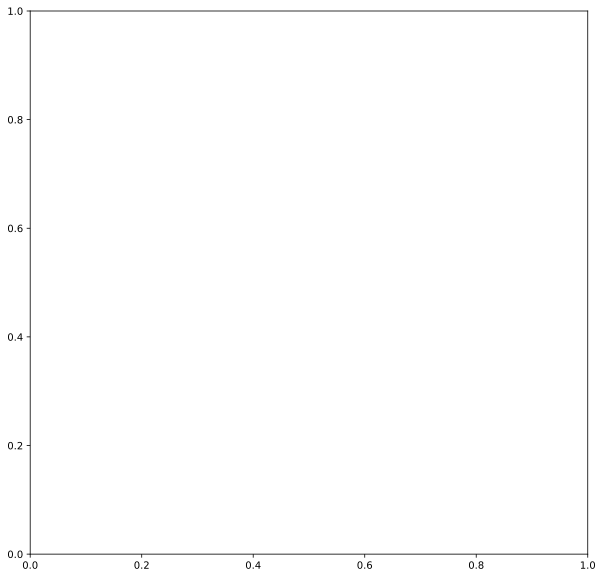

In [64]:
fig,ax = plt.subplots(figsize=(10,10))
station_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Station')

In [65]:
fig,ax = plt.subplots(figsize=(20,20))
nta_map.plot(ax=ax);
station_df.plot(ax=ax, markersize=20, color='red', marker='o', label = 'Station');

NameError: name 'station_df' is not defined